# AMZN STOCK

In [1]:
# Import the libraries
import requests
import pandas as pd
api_key = 'P2WPUADKKK3VTFV3'  
symbol = 'AMZN'
function = 'TIME_SERIES_DAILY'
url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}'
response = requests.get(url)
if response.status_code == 200:
    data = response.json()  
    time_series_data = data.get('Time Series (Daily)', {})
    df = pd.DataFrame.from_dict(time_series_data, orient='index')
    df = df.astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    print(df.head())

else:
    print(f"Error fetching data: {response.status_code}")


            1. open   2. high    3. low  4. close   5. volume
2024-08-07  166.550  167.5800  161.4300    162.77  48408240.0
2024-08-08  165.165  166.6899  162.5500    165.80  44616206.0
2024-08-09  166.400  168.5500  165.8500    166.94  36401049.0
2024-08-12  168.140  168.5500  166.1101    166.80  30072788.0
2024-08-13  167.810  171.0400  167.1000    170.23  39237915.0


# CLOSING PRICE

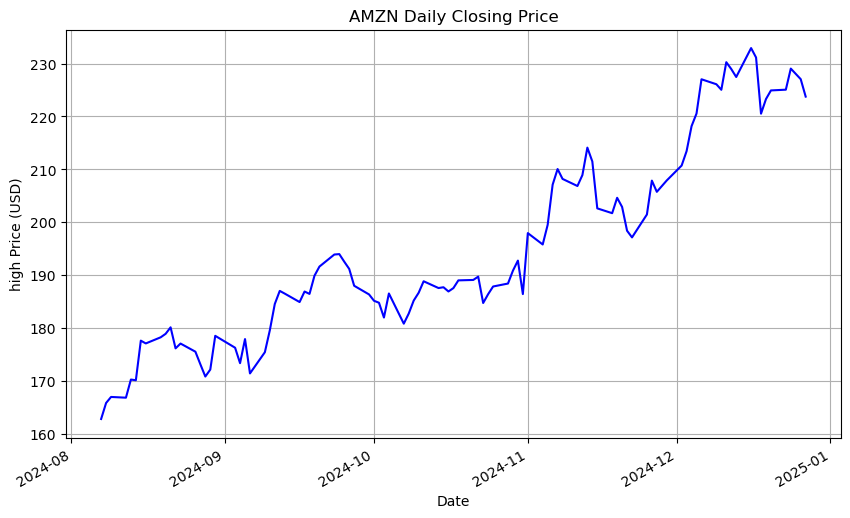

In [12]:
import matplotlib.pyplot as plt

# Plot the closing price over time
df['4. close'].plot(figsize=(10,6), title=f'{symbol} Daily Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('high Price (USD)')
plt.grid(True)
plt.show()


In [13]:
df.head()

,AMZN
2024-12-27,223.75
2024-12-26,227.05
2024-12-24,229.05
2024-12-23,225.06
2024-12-20,224.92


In [4]:
df.isnull().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-07-25 to 2024-12-13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [13]:
df.describe()

,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,194.579400,196.548382,192.500584,194.677600,3.728322e+07
std,18.034295,18.387032,17.966476,18.288822,1.507532e+07
min,165.165000,166.689900,161.430000,162.770000,1.500750e+07
25%,181.781250,183.352500,179.910925,181.670000,2.862708e+07
50%,189.207500,190.670000,187.350000,188.905000,3.542090e+07
75%,207.095000,208.535000,205.185000,207.867500,4.109431e+07
max,232.390000,233.000000,228.010000,232.930000,1.003786e+08


# CHANGES

In [15]:
# Calculate daily price change
df['price_change'] = df['4. close'].diff()

# Calculate daily percentage change (daily returns)
df['daily_return'] = df['4. close'].pct_change()

# Display the updated DataFrame with new columns
print(df[['4. close', 'price_change', 'daily_return']].tail())


            4. close  price_change  daily_return
2024-12-20    224.92          1.63      0.007300
2024-12-23    225.06          0.14      0.000622
2024-12-24    229.05          3.99      0.017729
2024-12-26    227.05         -2.00     -0.008732
2024-12-27    223.75         -3.30     -0.014534


In [12]:
df.columns


Index(['1. open', '2. high', '3. low', '4. close', '5. volume', 'price_change',
       'daily_return'],
      dtype='object')

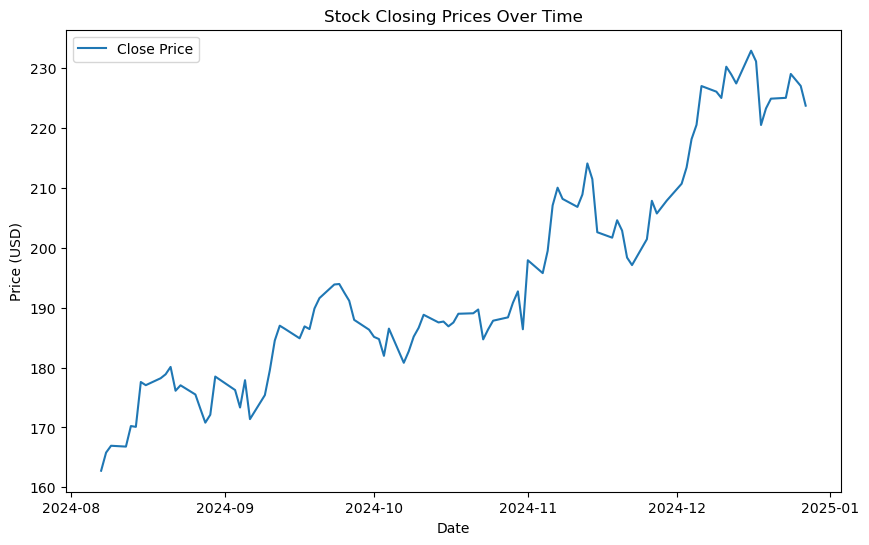

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['4. close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# CORRELATION

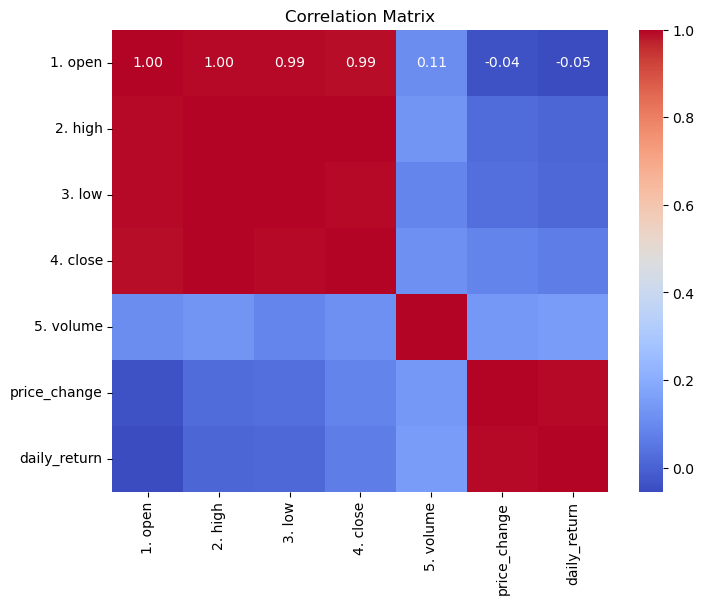

In [16]:
import seaborn as sns
# Calculate correlation matrix
correlation = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# 50 DAYS VS 200 DAYS STOCK

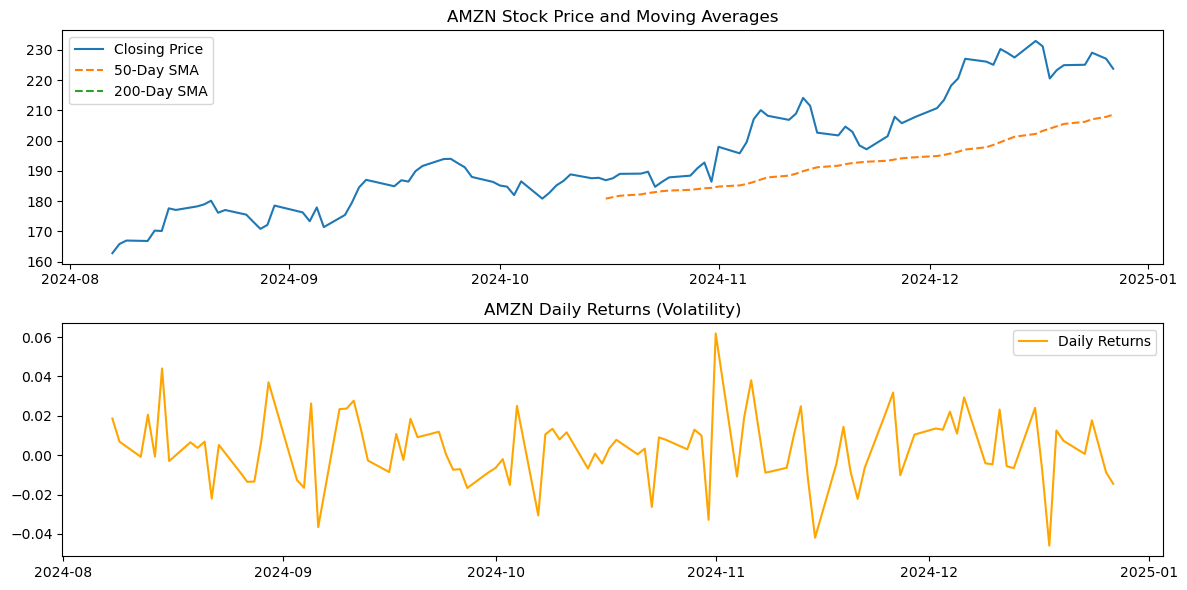

Stock Volatility (Standard Deviation of Daily Returns): 0.018019366501906803


In [17]:
# 50-day Moving Average
df['50_SMA'] = df['4. close'].rolling(window=50).mean()

# 200-day Moving Average
df['200_SMA'] = df['4. close'].rolling(window=200).mean()

# Calculate daily returns
df['Daily Return'] = df['4. close'].pct_change()
volatility = df['Daily Return'].std()
plt.figure(figsize=(12, 6))

# Plot stock price and moving averages
plt.subplot(2, 1, 1)
plt.plot(df['4. close'], label='Closing Price')
plt.plot(df['50_SMA'], label='50-Day SMA', linestyle='--')
plt.plot(df['200_SMA'], label='200-Day SMA', linestyle='--')
plt.title(f'{symbol} Stock Price and Moving Averages')
plt.legend()

# Plot daily returns
plt.subplot(2, 1, 2)
plt.plot(df['Daily Return'], label='Daily Returns', color='orange')
plt.title(f'{symbol} Daily Returns (Volatility)')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Stock Volatility (Standard Deviation of Daily Returns): {volatility}")


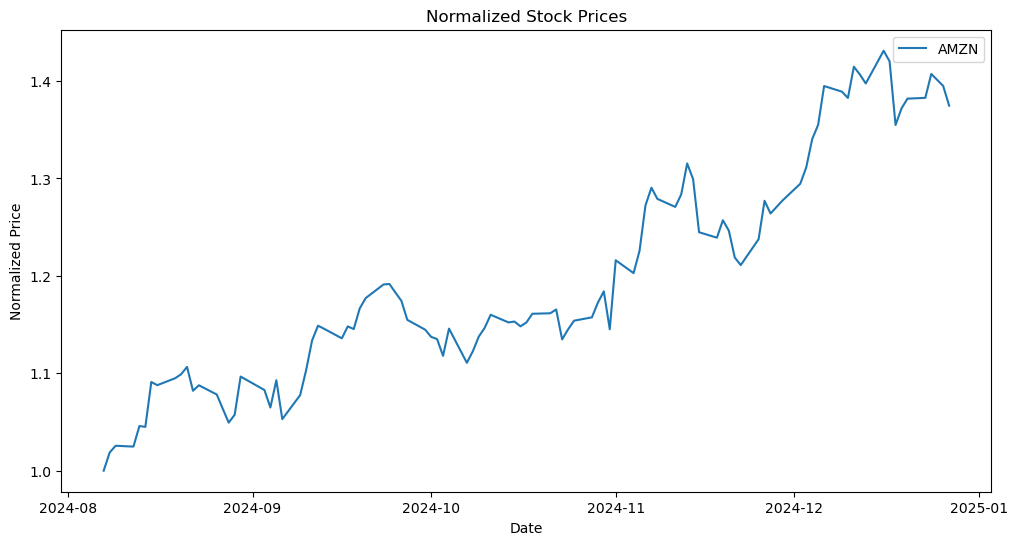

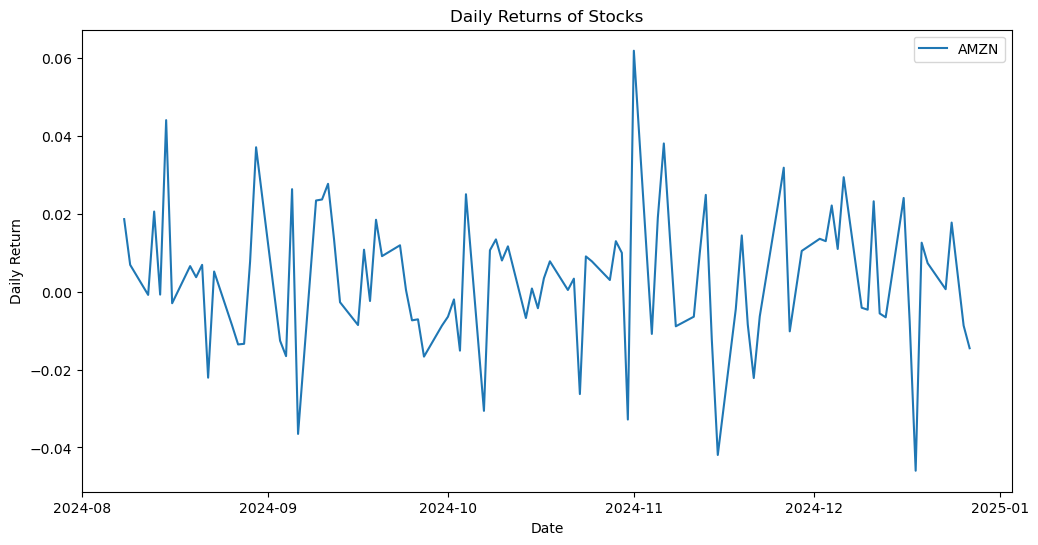

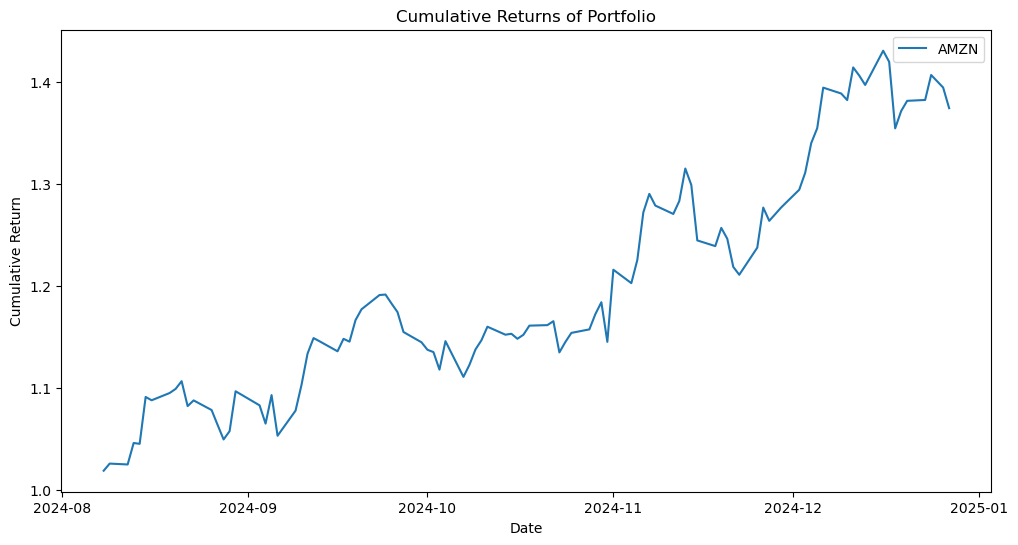

In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# List of stock symbols
symbols = ['AMZN'] 
api_key = 'P2WPUADKKK3VTFV3'

# Fetch data for each stock
data_frames = {}
for symbol in symbols:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'
    response = requests.get(url).json()
    df = pd.DataFrame(response['Time Series (Daily)']).T
    df = df.rename(columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Close',
        '5. volume': 'Volume'
    })
    df = df[['Close']].astype(float)
    df.columns = [symbol]
    data_frames[symbol] = df

# Combine all stocks into a single DataFrame
portfolio = pd.concat(data_frames.values(), axis=1)

# Convert index to datetime
portfolio.index = pd.to_datetime(portfolio.index)

# Sort by date
portfolio.sort_index(inplace=True)

# Normalize prices
normalized_portfolio = portfolio / portfolio.iloc[0]

# Calculate daily returns
daily_returns = portfolio.pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Visualization: Normalized stock prices
plt.figure(figsize=(12, 6))
for symbol in symbols:
    plt.plot(normalized_portfolio[symbol], label=symbol)
plt.title('Normalized Stock Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

# Visualization: Daily returns
plt.figure(figsize=(12, 6))
for symbol in symbols:
    plt.plot(daily_returns[symbol], label=symbol)
plt.title('Daily Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Visualization: Cumulative returns
plt.figure(figsize=(12, 6))
for symbol in symbols:
    plt.plot(cumulative_returns[symbol], label=symbol)
plt.title('Cumulative Returns of Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [17]:
df.columns

Index(['AMZN'], dtype='object')

# using machine learning models

Slope (coefficient): 0.020333333333335677
Intercept: 225.8846666666667


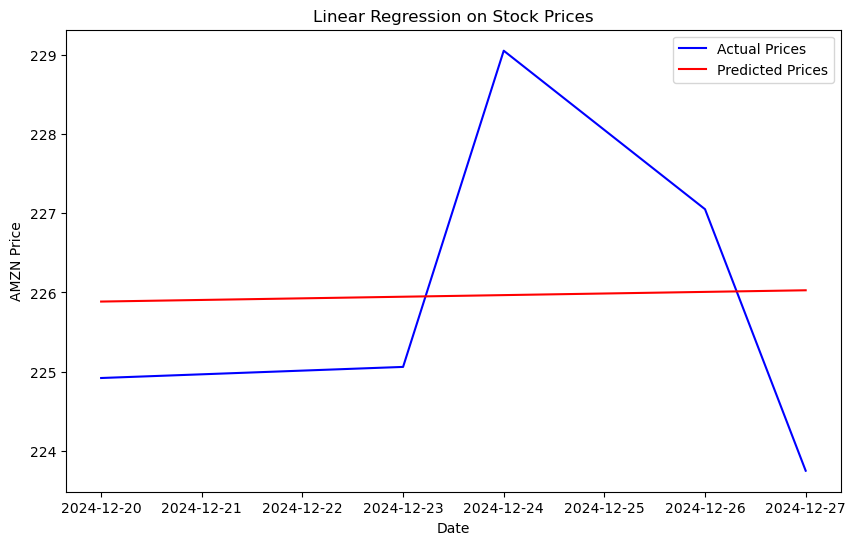

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create DataFrame
data = {
    'AMZN': [223.75, 227.05, 229.05, 225.06, 224.92]
}
dates = ['2024-12-27', '2024-12-26', '2024-12-24', '2024-12-23', '2024-12-20']
df = pd.DataFrame(data, index=dates)

# Reset index and prepare the DataFrame
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)

# Convert Date column to datetime and calculate Days
df['Date'] = pd.to_datetime(df['Date'])
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Define X and Y
X = df[['Days']]
Y = df['AMZN']

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predict and add predictions to DataFrame
df['Predicted'] = model.predict(X)

# Print insights
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AMZN'], label='Actual Prices', color='blue')
plt.plot(df['Date'], df['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('AMZN Price')
plt.title('Linear Regression on Stock Prices')
plt.legend()
plt.show()
